#**Inteligencia artificial**
##**Proyecto de unidad I - Junio, 2023**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

>**Integrantes**
*   Anselmo César Farfan Pajuelo
*   Jean Carlos Escobar Arcaya
*   Johan Marcos Condori Orellana
*   Alvaro Alejandro Rivera Ramirez
*   Romel Nelson Roy Melchor Rosas



---
Librerías del proyecto

In [ ]:
import pandas as pd # Para lectura de datos inicial
import numpy as np  # Para manejo de matrices con numpy
import matplotlib.pyplot as plt
from scipy.io import arff # Para lectura de archivo .arff
from sklearn.model_selection import train_test_split  # Para separar los conjunto de datos en evaluación y entrenamiento
from keras.models import Sequential # Para el uso de modelos secuenciales
from keras.layers import Dense  # Para establecer capas densas en el modelo

##**Regresión**

###**Problema a resolver** <br>
Realizar un modelo de regresión que determine el grado de carga de calefacción y refrigeración en función de las características físicas de unos edificios.

###**Procedimiento**

> 1. Carga del data set en el espacio de trabajo

In [ ]:
dataset = pd.read_excel('/content/ENB2012_data.xlsx', index_col=None)
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


> 2. Particionamos la data en dos grupos:entrenamiento y prueba

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(
    test_dataset
)

       X1     X2     X3     X4   X5  X6   X7  X8     Y1     Y2
9    0.86  588.0  294.0  147.0  7.0   3  0.0   0  19.95  21.97
11   0.86  588.0  294.0  147.0  7.0   5  0.0   0  18.31  27.87
19   0.79  637.0  343.0  147.0  7.0   5  0.0   0  28.75  39.44
23   0.76  661.5  416.5  122.5  7.0   5  0.0   0  23.93  29.40
28   0.71  710.5  269.5  220.5  3.5   2  0.0   0   6.37  11.27
..    ...    ...    ...    ...  ...  ..  ...  ..    ...    ...
746  0.74  686.0  245.0  220.5  3.5   4  0.4   5  14.17  16.94
753  0.69  735.0  294.0  220.5  3.5   3  0.4   5  14.28  15.87
754  0.69  735.0  294.0  220.5  3.5   4  0.4   5  14.37  16.54
759  0.66  759.5  318.5  220.5  3.5   5  0.4   5  15.16  18.06
763  0.64  784.0  343.0  220.5  3.5   5  0.4   5  17.88  21.40

[154 rows x 10 columns]


> 3. Separamos los 2 objetivos (Y1 y Y2) para poder normalizar los datos y entrenar al modelo.

In [ ]:
x_train = train_dataset.drop(["Y1","Y2"], axis=1)
y1_train = train_dataset[["Y1"]]
y2_train = train_dataset[["Y2"]]
x_test = test_dataset.drop(["Y1","Y2"], axis=1)
y1_test = test_dataset[["Y1"]]
y2_test = test_dataset[["Y2"]]
y_sup_train=pd.concat([y1_train,y2_train],axis=1)
y_sup_test=pd.concat([y1_test,y2_test],axis=1)

> 4. Normalizamos los dos grupos de datos, utilizando como fuente principal al grupo de entrenamiento.

In [ ]:
train_mean = x_train.mean()
train_std = x_train.std()
x_train = (x_train - train_mean) / train_std
x_test = (x_test - train_mean) / train_std

> 5. Creación del modelo con la particularidad de tener 2 neuronas en la capa de salida. Además se agregará 2 capas ocultas dado que estamos ante una regresión multivariable.

In [ ]:
model = Sequential([
    Dense(128, activation="relu", input_shape=[len(x_train.keys())]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(2,activation="linear")
])

> 6. Resumen del modelo de red neuronal con la cantidad de neuronas por capa y parámetros.

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1152      
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 11,554
Trainable params: 11,554
Non-trainable params: 0
_________________________________________________________________


> 7. Configuramos el modelo para el entrenamiento especificando la función de perdida, optimizador y métricas de error. Luego entrenamos el modelo.

In [ ]:
model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])

In [ ]:
# Train the model
history= model.fit(x_train, y_sup_train, epochs=250,validation_data=(x_test,y_sup_test))

Epoch 1/250
20/20 [==============================] - 1s 14ms/step - loss: 614.1814 - mae: 22.7052 - mse: 614.1814 - val_loss: 473.7649 - val_mae: 19.3560 - val_mse: 473.7649
Epoch 2/250
20/20 [==============================] - 0s 4ms/step - loss: 421.3797 - mae: 18.0508 - mse: 421.3797 - val_loss: 215.8402 - val_mae: 11.4902 - val_mse: 215.8402
Epoch 3/250
20/20 [==============================] - 0s 5ms/step - loss: 124.4851 - mae: 8.1710 - mse: 124.4851 - val_loss: 59.7186 - val_mae: 5.6121 - val_mse: 59.7186
Epoch 4/250
20/20 [==============================] - 0s 4ms/step - loss: 53.5441 - mae: 4.9803 - mse: 53.5441 - val_loss: 35.6173 - val_mae: 4.0289 - val_mse: 35.6173
Epoch 5/250
20/20 [==============================] - 0s 5ms/step - loss: 35.6205 - mae: 4.2865 - mse: 35.6205 - val_loss: 28.4976 - val_mae: 3.6562 - val_mse: 28.4976
Epoch 6/250
20/20 [==============================] - 0s 5ms/step - loss: 30.5938 - mae: 4.0211 - mse: 30.5938 - val_loss: 25.0036 - val_mae: 3.4351 - 

> 8. Evaluando el modelo

In [ ]:
test_loss, test_mae, test_mse = model.evaluate(x_test, y_sup_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.8756 - mae: 0.5961 - mse: 0.8756


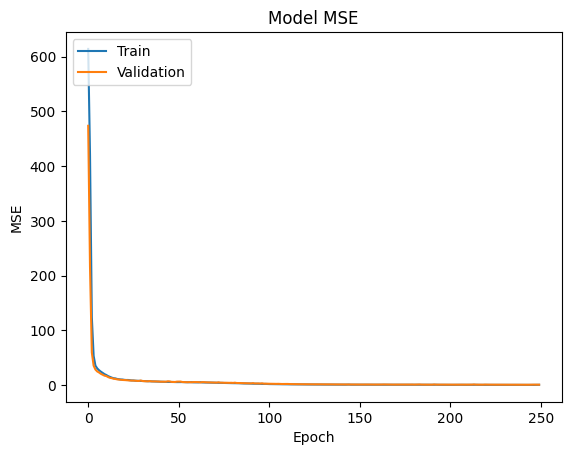

In [ ]:
# Plot the training history
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()


> 9. Realizamos la predicción con el grupo de prueba

In [ ]:
results= model.predict(x_test)
results

5/5 [==============================] - 0s 3ms/step


array([[19.586634 , 24.182608 ],
       [18.518776 , 27.989988 ],
       [29.19126  , 36.247936 ],
       [25.816906 , 30.646357 ],
       [ 6.8431854, 12.105248 ],
       [ 7.3813963, 12.793756 ],
       [ 8.40182  , 13.754411 ],
       [10.918668 , 16.991928 ],
       [10.57378  , 17.31889  ],
       [10.073943 , 16.671839 ],
       [ 8.0023365, 12.932611 ],
       [30.196247 , 30.296797 ],
       [27.30205  , 27.334158 ],
       [26.301294 , 27.570269 ],
       [32.24792  , 34.174854 ],
       [10.930755 , 14.190543 ],
       [11.495175 , 14.511491 ],
       [11.277011 , 14.928044 ],
       [11.972537 , 15.334729 ],
       [11.629299 , 15.37485  ],
       [11.70284  , 15.496503 ],
       [15.080977 , 19.604416 ],
       [13.417307 , 15.214765 ],
       [12.8406925, 15.153043 ],
       [24.423664 , 25.986109 ],
       [24.085213 , 27.152643 ],
       [36.309246 , 38.71353  ],
       [33.18388  , 34.698654 ],
       [10.825917 , 14.2717   ],
       [11.23121  , 14.277682 ],
       [11

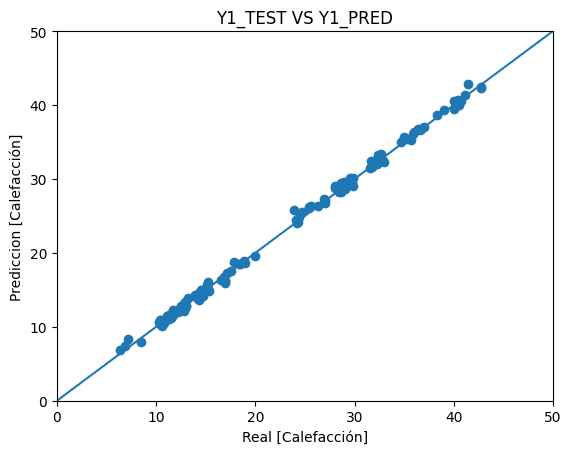

In [ ]:
y1_pred=results[:,0]
plt.title("Y1_TEST VS Y1_PRED")
plt.scatter(y1_test, y1_pred)
plt.xlabel('Real [Calefacción]')
plt.ylabel('Prediccion [Calefacción]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

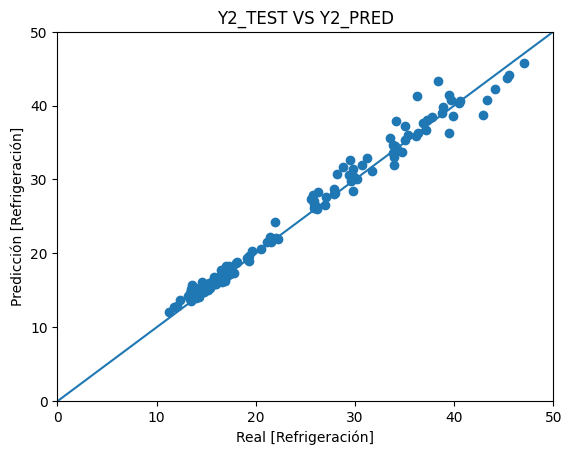

In [ ]:
y2_pred=results[:,1]
# y2_pred=results
plt.title("Y2_TEST VS Y2_PRED")
plt.scatter(y2_test, y2_pred)
plt.xlabel('Real [Refrigeración]')
plt.ylabel('Predicción [Refrigeración]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

> 10. Comparación de resultados

20/20 [==============================] - 0s 3ms/step


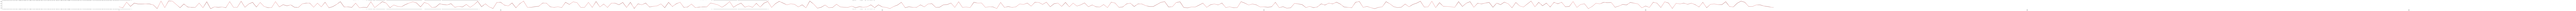

In [ ]:
plt.figure(figsize=(614,2))

plt.plot(np.arange(614), y1_train, linewidth=1, color='black')
plt.plot(np.arange(614), model.predict(x_train)[:,0], linewidth=1, color='red')

plt.show()

5/5 [==============================] - 0s 4ms/step


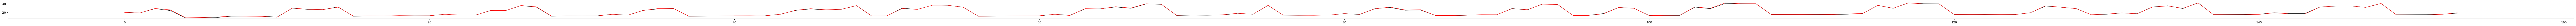

In [ ]:
plt.figure(figsize=(154,1))

plt.plot(np.arange(154), y1_test, linewidth=1, color='black')
plt.plot(np.arange(154), model.predict(x_test)[:,0], linewidth=1, color='red')

plt.show()

20/20 [==============================] - 0s 1ms/step


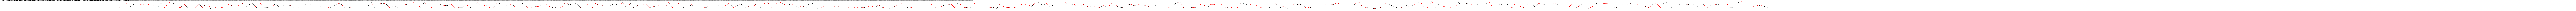

In [ ]:
plt.figure(figsize=(614,2))

plt.plot(np.arange(614), y2_train, linewidth=1, color='black')
plt.plot(np.arange(614), model.predict(x_train)[:,1], linewidth=1, color='red')

plt.show()

5/5 [==============================] - 0s 2ms/step


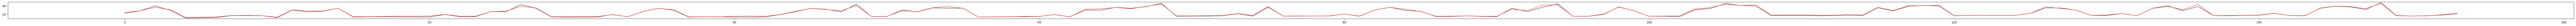

In [ ]:
plt.figure(figsize=(154,1))

plt.plot(np.arange(154), y2_test, linewidth=1, color='black')
plt.plot(np.arange(154), model.predict(x_test)[:,1], linewidth=1, color='red')

plt.show()

**PARTE COMPARATIVA ENTRE NORMALIZACION POR ESTANDARIZACION Y MAX MIN**

Ingresamos la normalizacion por maxmin para comparar con los resultados obtenidos con la normalizacion por estandarizacion
Se destaca que la normalizacion por max min estala los datos de 0 a 1 y la normalizacion por estandarizacion la media esta en 0 siempre.

La ventaja que tiene la normalizacion por estandarizacion es que ayuda en la convergencia, o en otras palabras al ser 0 su media el calculo de los pesos se hace mas rapido y por lo tanto llega a mejores resultados

In [ ]:
x_train_maxmin=(x_train-np.min(x_train,axis=0))/(np.max(x_train,axis=0)-np.min(x_train,axis=0))
x_test_maxmin=(x_test-np.min(x_test,axis=0))/(np.max(x_test,axis=0)-np.min(x_test,axis=0))


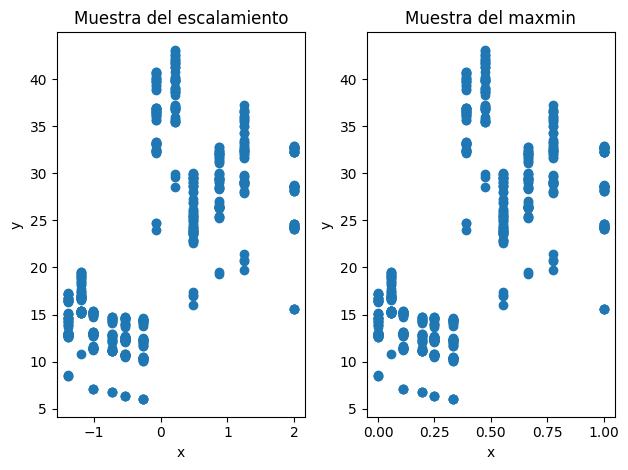

In [ ]:

x_trainx_estand =pd.concat([x_train["X1"],y1_train],axis=1)
x_trainx1_maxmin =pd.concat([x_train_maxmin["X1"],y1_train],axis=1)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].set_title("Muestra del escalamiento")
axs[0].scatter(x_trainx_estand['X1'], x_trainx_estand['Y1'])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].set_title("Muestra del maxmin")
axs[1].scatter(x_trainx1_maxmin['X1'], x_trainx1_maxmin['Y1'])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.tight_layout()
plt.show()


Compararemos los resultados con normalizacion max min y los resultados con normalizacion una vez entrenados

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1152      
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 11,554
Trainable params: 11,554
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
20/20 [==============================] - 2s 20ms/step - loss: 621.7820 - mae: 22.9302 - mse: 621.7820 - val_loss: 497.6860 - val_mae: 20.0289 - val_mse: 497.6860
Epoch 2/

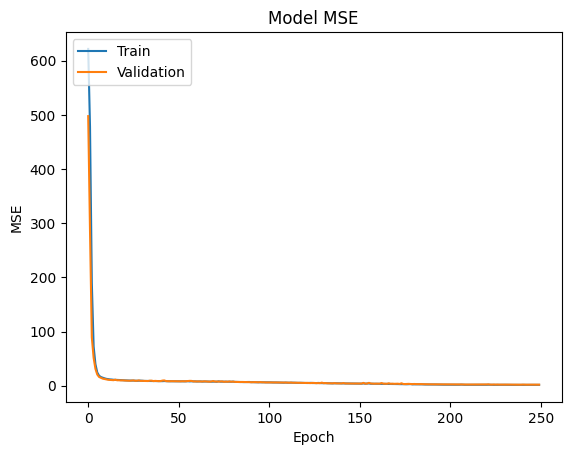

5/5 [==============================] - 0s 4ms/step


In [ ]:
dataset = pd.read_excel('/content/ENB2012_data.xlsx', index_col=None)
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
x_train = train_dataset.drop(["Y1","Y2"], axis=1)
y1_train = train_dataset[["Y1"]]
y2_train = train_dataset[["Y2"]]
x_test = test_dataset.drop(["Y1","Y2"], axis=1)
y1_test = test_dataset[["Y1"]]
y2_test = test_dataset[["Y2"]]
y_sup_train=pd.concat([y1_train,y2_train],axis=1)
y_sup_test=pd.concat([y1_test,y2_test],axis=1)
model = Sequential([
    Dense(128, activation="relu", input_shape=[len(x_train.keys())]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(2,activation="linear")
])
model.summary()
model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])
history= model.fit(x_train_maxmin, y_sup_train, epochs=250,validation_data=(x_test_maxmin,y_sup_test))
test_loss, test_mae, test_mse = model.evaluate(x_test_maxmin, y_sup_test)

# Plot the training history
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

results_maxmin= model.predict(x_test_maxmin)


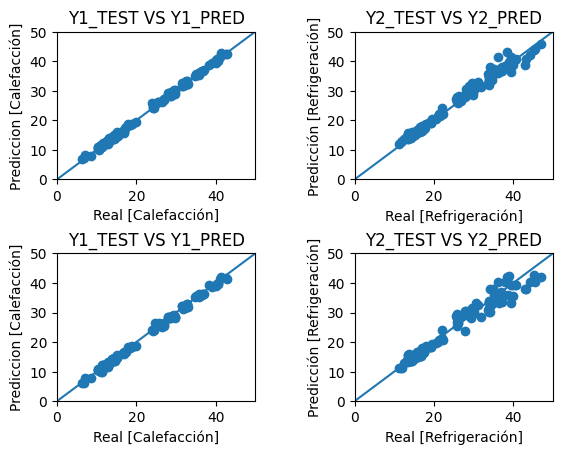

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

y1_pred=results[:,0]
axs[0][0].set_title("Y1_TEST VS Y1_PRED")
axs[0][0].scatter(y1_test, y1_pred)
axs[0][0].set_xlabel('Real [Calefacción]')
axs[0][0].set_ylabel('Prediccion [Calefacción]')
lims = [0, 50]
axs[0][0].set_xlim(lims)
axs[0][0].set_ylim(lims)
axs[0][0].plot(lims, lims)

y2_pred=results[:,1]
# y2_pred=results
axs[0][1].set_title("Y2_TEST VS Y2_PRED")
axs[0][1].scatter(y2_test, y2_pred)
axs[0][1].set_xlabel('Real [Refrigeración]')
axs[0][1].set_ylabel('Predicción [Refrigeración]')
lims = [0, 50]
axs[0][1].set_xlim(lims)
axs[0][1].set_ylim(lims)
axs[0][1].plot(lims, lims)

y1_pred=results_maxmin[:,0]
axs[1][0].set_title("Y1_TEST VS Y1_PRED")
axs[1][0].scatter(y1_test, y1_pred)
axs[1][0].set_xlabel('Real [Calefacción]')
axs[1][0].set_ylabel('Prediccion [Calefacción]')
lims = [0, 50]
axs[1][0].set_xlim(lims)
axs[1][0].set_ylim(lims)
axs[1][0].plot(lims, lims)

y2_pred=results_maxmin[:,1]
# y2_pred=results
axs[1][1].set_title("Y2_TEST VS Y2_PRED")
axs[1][1].scatter(y2_test, y2_pred)
axs[1][1].set_xlabel('Real [Refrigeración]')
axs[1][1].set_ylabel('Predicción [Refrigeración]')
lims = [0, 50]
axs[1][1].set_xlim(lims)
axs[1][1].set_ylim(lims)
axs[1][1].plot(lims, lims)



## **REGRESION CON 8 ENTRADAS Y 1 SALIDA**





In [ ]:
dataset = pd.read_excel('/content/ENB2012_data.xlsx', index_col=None)
dataset=dataset.drop(["Y1"], axis=1)
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.61


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(
    test_dataset
)

       X1     X2     X3     X4   X5  X6   X7  X8     Y2
9    0.86  588.0  294.0  147.0  7.0   3  0.0   0  21.97
11   0.86  588.0  294.0  147.0  7.0   5  0.0   0  27.87
19   0.79  637.0  343.0  147.0  7.0   5  0.0   0  39.44
23   0.76  661.5  416.5  122.5  7.0   5  0.0   0  29.40
28   0.71  710.5  269.5  220.5  3.5   2  0.0   0  11.27
..    ...    ...    ...    ...  ...  ..  ...  ..    ...
746  0.74  686.0  245.0  220.5  3.5   4  0.4   5  16.94
753  0.69  735.0  294.0  220.5  3.5   3  0.4   5  15.87
754  0.69  735.0  294.0  220.5  3.5   4  0.4   5  16.54
759  0.66  759.5  318.5  220.5  3.5   5  0.4   5  18.06
763  0.64  784.0  343.0  220.5  3.5   5  0.4   5  21.40

[154 rows x 9 columns]


In [ ]:
x_train = train_dataset.drop(["Y2"], axis=1)
y_train = train_dataset[["Y2"]]
x_test = test_dataset.drop(["Y2"], axis=1)
y_test = test_dataset[["Y2"]]
x_train

,X1,X2,X3,X4,X5,X6,X7,X8
661,0.66,759.5,318.5,220.50,3.5,3,0.4,3
122,0.74,686.0,245.0,220.50,3.5,4,0.1,2
113,0.79,637.0,343.0,147.00,7.0,3,0.1,2
14,0.82,612.5,318.5,147.00,7.0,4,0.0,0
529,0.98,514.5,294.0,110.25,7.0,3,0.4,1
...,...,...,...,...,...,...,...,...
25,0.74,686.0,245.0,220.50,3.5,3,0.0,0
110,0.82,612.5,318.5,147.00,7.0,4,0.1,2
149,0.90,563.5,318.5,122.50,7.0,3,0.1,3
152,0.86,588.0,294.0,147.00,7.0,2,0.1,3


In [ ]:

train_mean = x_train.mean()
train_std = x_train.std()
x_train_est = (x_train - train_mean) / train_std
x_test_est = (x_test - train_mean) / train_std
x_test_est



,X1,X2,X3,X4,X5,X6,X7,X8
9,0.866007,-0.911009,-0.565648,-0.611336,0.957734,-0.416538,-1.783396,-1.85652
11,0.866007,-0.911009,-0.565648,-0.611336,0.957734,1.390914,-1.783396,-1.85652
19,0.207927,-0.356089,0.538669,-0.611336,0.957734,1.390914,-1.783396,-1.85652
23,-0.074107,-0.078629,2.195145,-1.152591,0.957734,1.390914,-1.783396,-1.85652
28,-0.544164,0.476291,-1.117806,1.012429,-1.042431,-1.320265,-1.783396,-1.85652
...,...,...,...,...,...,...,...,...
746,-0.262129,0.198831,-1.669965,1.012429,-1.042431,0.487188,1.249859,1.39292
753,-0.732186,0.753751,-0.565648,1.012429,-1.042431,-0.416538,1.249859,1.39292
754,-0.732186,0.753751,-0.565648,1.012429,-1.042431,0.487188,1.249859,1.39292
759,-1.014221,1.031211,-0.013489,1.012429,-1.042431,1.390914,1.249859,1.39292


In [ ]:
model = Sequential([
    Dense(128, activation="relu", input_shape=[len(x_train.keys())]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1,activation="linear")
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mse", optimizer='adam', metrics=["mae", "mse"])

In [ ]:
# Train the model
history= model.fit(x_train_est, y_train, epochs=150,validation_data=(x_test_est, y_test))

Epoch 1/150
20/20 [==============================] - 1s 9ms/step - loss: 677.4489 - mae: 24.2246 - mse: 677.4489 - val_loss: 555.9036 - val_mae: 21.5124 - val_mse: 555.9036
Epoch 2/150
20/20 [==============================] - 0s 3ms/step - loss: 546.1987 - mae: 21.3890 - mse: 546.1987 - val_loss: 363.2642 - val_mae: 16.6286 - val_mse: 363.2642
Epoch 3/150
20/20 [==============================] - 0s 2ms/step - loss: 249.5612 - mae: 13.0409 - mse: 249.5612 - val_loss: 68.6338 - val_mae: 5.7116 - val_mse: 68.6338
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: 54.6657 - mae: 5.3177 - mse: 54.6657 - val_loss: 39.1365 - val_mae: 4.2658 - val_mse: 39.1365
Epoch 5/150
20/20 [==============================] - 0s 3ms/step - loss: 41.2295 - mae: 4.6402 - mse: 41.2295 - val_loss: 33.3999 - val_mae: 3.9935 - val_mse: 33.3999
Epoch 6/150
20/20 [==============================] - 0s 2ms/step - loss: 33.7177 - mae: 4.3140 - mse: 33.7177 - val_loss: 29.5228 - val_mae: 3.7698 - 

In [ ]:
test_loss, test_mae, test_mse = model.evaluate(x_test_est, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 2.2346 - mae: 1.0087 - mse: 2.2346


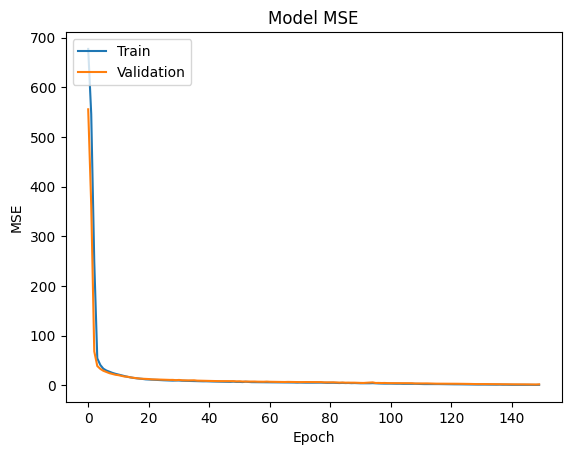

In [ ]:
# Plot the training history
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
results= model.predict(x_test_est)
results

5/5 [==============================] - 0s 1ms/step


array([[24.268974 ],
       [29.361626 ],
       [36.130844 ],
       [32.660583 ],
       [11.877959 ],
       [12.39054  ],
       [13.198197 ],
       [16.490953 ],
       [15.508067 ],
       [14.996596 ],
       [12.182029 ],
       [29.686823 ],
       [26.858246 ],
       [27.225887 ],
       [33.684513 ],
       [13.508197 ],
       [13.549218 ],
       [13.949469 ],
       [14.563442 ],
       [14.684033 ],
       [14.479814 ],
       [18.38531  ],
       [14.405423 ],
       [14.714044 ],
       [26.587685 ],
       [27.004013 ],
       [38.01056  ],
       [34.76788  ],
       [13.721046 ],
       [13.688281 ],
       [14.053233 ],
       [14.070973 ],
       [18.645073 ],
       [14.905883 ],
       [26.706795 ],
       [33.821228 ],
       [31.351706 ],
       [13.601903 ],
       [14.292086 ],
       [13.558102 ],
       [14.492534 ],
       [15.100663 ],
       [14.540956 ],
       [18.708204 ],
       [27.985275 ],
       [33.506516 ],
       [30.638561 ],
       [28.74

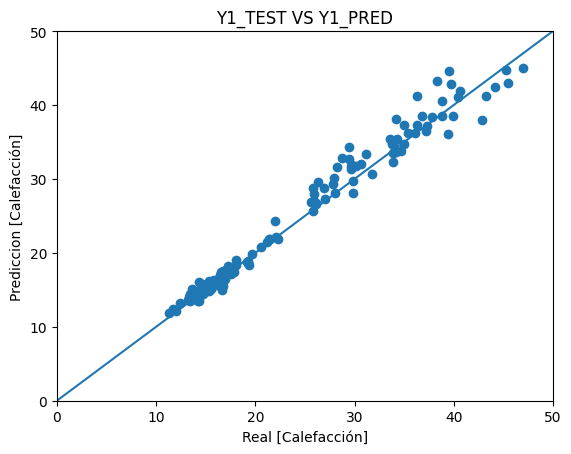

In [ ]:
y_pred=results[:,0]
plt.title("Y1_TEST VS Y1_PRED")
plt.scatter(y_test, y_pred)
plt.xlabel('Real [Calefacción]')
plt.ylabel('Prediccion [Calefacción]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

20/20 [==============================] - 0s 962us/step


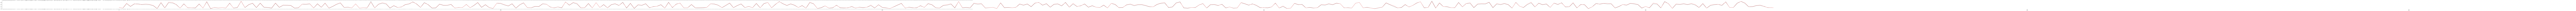

In [ ]:
plt.figure(figsize=(614,2))

plt.plot(np.arange(614), y_train, linewidth=1, color='black')
plt.plot(np.arange(614), model.predict(x_train_est)[:,0], linewidth=1, color='red')

plt.show()

5/5 [==============================] - 0s 3ms/step


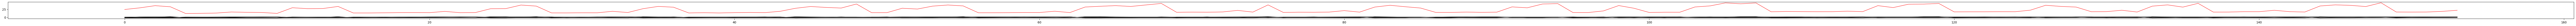

In [ ]:
plt.figure(figsize=(154,1))

plt.plot(np.arange(154), x_test_est, linewidth=1, color='black')
plt.plot(np.arange(154), model.predict(x_test_est), linewidth=1, color='red')

plt.show()

In [ ]:
#Ejecucion con normalizacion max min
x_train_mm=(x_train-np.min(x_train,axis=0))/(np.max(x_train,axis=0)-np.min(x_train,axis=0))
x_train
x_test_mm=(x_test-np.min(x_test,axis=0))/(np.max(x_test,axis=0)-np.min(x_test,axis=0))
x_test

##**Clasificación**

### **Problema a resolver**

Realizar un modelo que clasifique un sitio web en base a 30 atributos como "Sitio de phishing" o "Sitio legítimo"



1.    having_IP_Address  { -1,1 }
2.    URL_Length   { 1,0,-1 }
3.    Shortining_Service { 1,-1 }
4.    having_At_Symbol   { 1,-1 }
5.    double_slash_redirecting { -1,1 }
6.    Prefix_Suffix  { -1,1 }
7.    having_Sub_Domain  { -1,0,1 }
8.    SSLfinal_State  { -1,1,0 }
9.    Domain_registeration_length { -1,1 }
10.    Favicon { 1,-1 }
11.    port { 1,-1 }
12.    HTTPS_token { -1,1 }
13.    Request_URL  { 1,-1 }
14.    URL_of_Anchor { -1,0,1 }
15.    Links_in_tags { 1,-1,0 }
16.    SFH  { -1,1,0 }
17.    Submitting_to_email { -1,1 }
18.    Abnormal_URL { -1,1 }
19.    Redirect  { 0,1 }
20.    on_mouseover  { 1,-1 }
21.    RightClick  { 1,-1 }
22.    popUpWidnow  { 1,-1 }
23.    Iframe { 1,-1 }
24.    age_of_domain  { -1,1 }
25.    DNSRecord   { -1,1 }
26.    web_traffic  { -1,0,1 }
27.    Page_Rank { -1,1 }
28.    Google_Index { 1,-1 }
29.    Links_pointing_to_page { 1,0,-1 }
30.    Statistical_report { -1,1 }
1.    Result  { -1,1 }




> Se utilizara un clasificador binario, 30 neuronas de entrada y 1 de salida

Modelo de clasificación binaria

### **Procedimiento**

> 1. Carga del data set en el espacio de trabajo

In [ ]:
# data, meta = arff.loadarff('/content/Training Dataset.arff')
data, meta = arff.loadarff(
    '/content/drive/MyDrive/UNIVERSIDAD/2023-I/IA/Training Dataset.arff')

df = pd.DataFrame(data)

df = df.applymap(lambda x: int(x.decode('utf-8')))
data = df.values

> 2. Particionando el data set en sub conjuntos para evaluación y entrenamiento

In [ ]:
x = data[:, :-1] # todas las filas, todas las columnas hasta < la última
y = np.array(list(map(lambda x: x if x == 1 else 0, data[:, -1])))

# Separando data set en entrenamiento y evaluación
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2, random_state=42)

> 3. Construyendo el modelo


In [ ]:
model = Sequential([
    Dense(8, input_dim=30, activation='relu'),
    Dense(4, input_dim=30, activation='relu'),
    Dense(2, input_dim=30, activation='relu'),
    Dense(1, activation='sigmoid')
])

> 4. Compilando el modelo

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_eval, y_eval), epochs=100, batch_size=256)

> 5. Evaluando el modelo

In [ ]:
_, accuracy = model.evaluate(x_eval, y_eval)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
history.history.keys()

> 6. Gráfico de historial de error

In [ ]:
plt.title("Gráfica de loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Entrenamiento", "Validación"], loc="upper right")

> 7. Gráfico de historial de accuracy

In [ ]:
plt.title("Gráfica de accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Entrenamiento", "Validación"], loc="lower right")

> 8. Gráfico de historial de accuracy

In [ ]:
y_pred = model.predict(x_eval)
y_pred = tf.round(y_pred)

matriz_confusion = confusion_matrix(y_eval, y_pred)
print(matriz_confusion)